In [1]:
import solveBSE_fromG4_threeband5new

self.symmetrize_G4= False
Transferred frequency iwm =  0
Transferred momentum q =  [0. 0.]
Vertex channel =  PARTICLE_PARTICLE_UP_DOWN
Inverse temperature =  10.0
U_pp =  0.01
U_dd =  8.5
t_pp =  0.49
t_pd =  1.13
ep_p =  3.245
ep_d =  4.25
filling =  1.15
actual filling: [1.15035104]
sign: [0.50392992]
orbital occupancy: [[0.35313831 0.11101527 0.11102194]
 [0.35313831 0.11101527 0.11102194]]
Cu filling = 0.7062766265322227
Ox filling = 0.22203053098584796
Oy filling = 0.2220438795728174
L2_Sigma_difference = [0.00033052]
K-vectors:  [[0.         0.        ]
 [0.         1.04719755]
 [0.         2.0943951 ]
 [0.         3.14159265]
 [0.         4.1887902 ]
 [0.         5.23598776]
 [1.04719755 0.        ]
 [1.04719755 1.04719755]
 [1.04719755 2.0943951 ]
 [1.04719755 3.14159265]
 [1.04719755 4.1887902 ]
 [1.04719755 5.23598776]
 [2.0943951  0.        ]
 [2.0943951  1.04719755]
 [2.0943951  2.0943951 ]
 [2.0943951  3.14159265]
 [2.0943951  4.1887902 ]
 [2.0943951  5.23598776]
 [3.14159

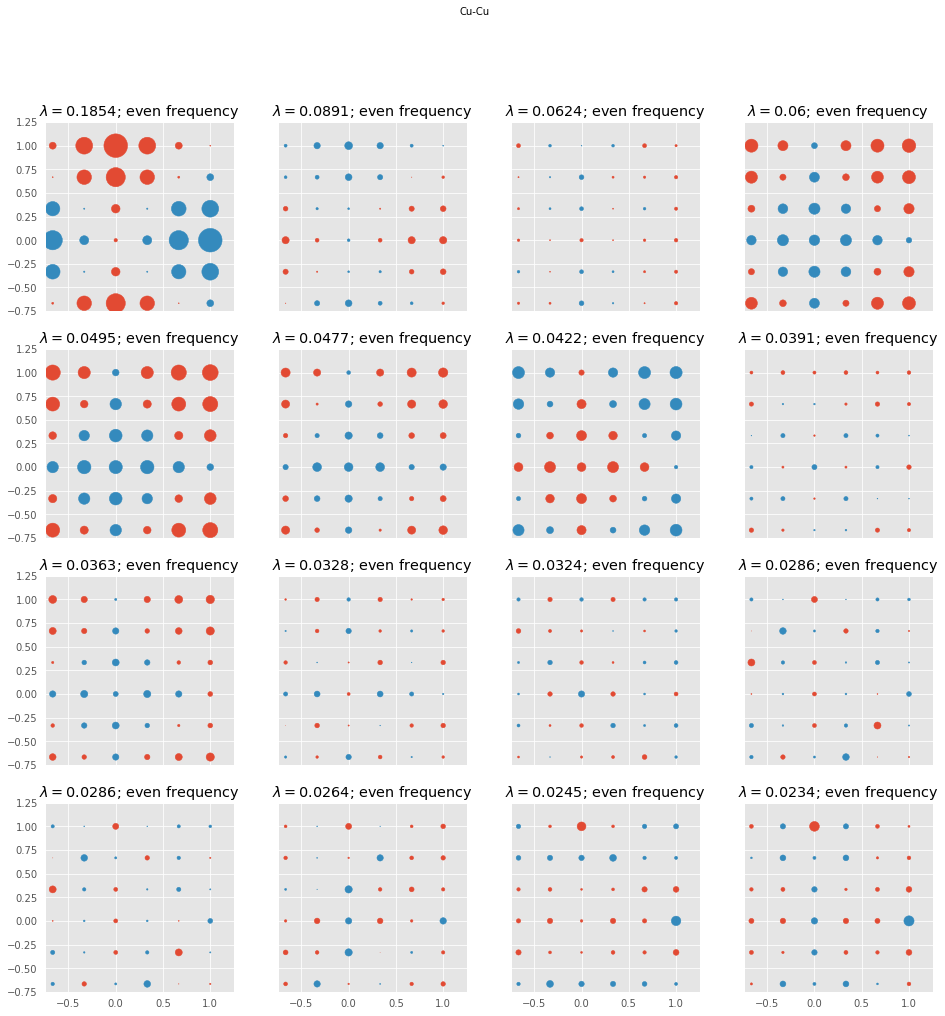

In [2]:
b=solveBSE_fromG4_threeband5new.BSE("dca_tptb6by6b10Upp0n115.hdf5",fileG="trewtw.hdf5",draw=True,useG0=False,symmetrize_G4=False,phSymmetry=False,calcRedVertex=True,calcCluster=False,nkfine=100)

In [5]:
import math
from numpy import *
import symmetrize_Nc6x6
evecssym=b.evecs[:,:,:,:,:].copy()
nwn = b.evecs.shape[0]
evecssymsign=evecssym.copy()
Nc=b.Nc
for iK1 in range(Nc):
    for b1 in range(3):
        for b2 in range(3):
            evecssymsign[int(b.NwG4/2),iK1,b1,b2,0]=evecssym[int(b.NwG4/2),iK1,b1,b2,0]/abs(real(evecssym[int(b.NwG4/2),iK1,b1,b2,0]))
        
sym=symmetrize_Nc6x6.symmetrize()
type=dtype(b.evecs[0,0,0,0,0])
for iK1 in range(0,Nc):
    tmp = zeros((nwn),dtype=type)
    tmp1 = zeros((nwn),dtype=type)
    tmp2 = zeros((nwn),dtype=type)
    for iSym in [1,3,6,7]: # Apply every point-group symmetry operation
        iK1Trans = sym.symmTrans_of_iK(iK1,iSym)
        tmp = evecssym[:,iK1,0,0,0] - evecssym[:,iK1Trans,0,0,0]
        tmp1 = evecssym[:,iK1,1,1,0] - evecssym[:,iK1Trans,2,2,0]
        tmp2 = evecssym[:,iK1,2,2,0] - evecssym[:,iK1Trans,1,1,0]
        evecssym[:,iK1,0,0,0] = tmp/2.
        evecssym[:,iK1Trans,0,0,0] = -tmp/2.
        evecssym[:,iK1,1,1,0] = tmp1/2.
        evecssym[:,iK1Trans,2,2,0] = -tmp1/2.
        evecssym[:,iK1,2,2,0] = tmp2/2.
        evecssym[:,iK1Trans,1,1,0] = -tmp2/2.
    
    tmp=0;tmp1=0;tmp2=0;
    for iSym in [0,2,4,5]: # Apply every point-group symmetry operation
        iK1Trans = sym.symmTrans_of_iK(iK1,iSym)
        tmp +=  evecssym[:,iK1Trans,0,0,0]
        tmp1 +=  evecssym[:,iK1Trans,1,1,0]
        tmp2 += evecssym[:,iK1Trans,2,2,0]
    for iSym in [0,2,4,5]: # Apply every point-group symmetry operation
        iK1Trans = sym.symmTrans_of_iK(iK1,iSym)
        evecssym[:,iK1Trans,0,0,0] = tmp/4.
        evecssym[:,iK1Trans,1,1,0] = tmp1/4.
        evecssym[:,iK1Trans,2,2,0] = tmp2/4.

for k in [1,2]:
    for g in range(6):
        if (real(evecssym[16,k+6*g,1,2,0])*real(evecssym[16,6-(k+6*g)+12*g,1,2,0])<0):
            tmp1 = evecssym[:,k+6*g,1,2,0] - evecssym[:,6-(k+6*g)+12*g,1,2,0]
            evecssym[:,k+6*g,1,2,0] = tmp1/2.
            evecssym[:,6-(k+6*g)+12*g,1,2,0] = -tmp1/2.
            tmp1 = evecssym[:,k+6*g,2,1,0] - evecssym[:,6-(k+6*g)+12*g,2,1,0]
            evecssym[:,k+6*g,2,1,0] = tmp1/2.
            evecssym[:,6-(k+6*g)+12*g,2,1,0] = -tmp1/2.
        else:
            tmp1 = evecssym[:,k+6*g,1,2,0] + evecssym[:,6-(k+6*g)+12*g,1,2,0]
            evecssym[:,k+6*g,1,2,0] = tmp1/2.
            evecssym[:,6-(k+6*g)+12*g,1,2,0] = tmp1/2.
            tmp1 = evecssym[:,k+6*g,2,1,0] + evecssym[:,6-(k+6*g)+12*g,2,1,0]
            evecssym[:,k+6*g,2,1,0] = tmp1/2.
            evecssym[:,6-(k+6*g)+12*g,2,1,0] = tmp1/2.

for k in [1,2]:
    for g in range(6):
        if (real(evecssym[16,6*k+g,1,2,0])*real(evecssym[16,6*k+g+12*(3-k),1,2,0])<0):
            tmp1 = evecssym[:,6*k+g,1,2,0] - evecssym[:,6*k+g+12*(3-k),1,2,0]
            evecssym[:,6*k+g,1,2,0] = tmp1/2.
            evecssym[:,6*k+g+12*(3-k),1,2,0] = - tmp1/2.
            tmp1 = evecssym[:,6*k+g,2,1,0] - evecssym[:,6*k+g+12*(3-k),2,1,0]
            evecssym[:,6*k+g,2,1,0] = tmp1/2.
            evecssym[:,6*k+g+12*(3-k),2,1,0] = - tmp1/2.                    
        else:
            tmp1 = evecssym[:,6*k+g,1,2,0] + evecssym[:,6*k+g+12*(3-k),1,2,0]
            evecssym[:,6*k+g,1,2,0] = tmp1/2.
            evecssym[:,6*k+g+12*(3-k),1,2,0] = tmp1/2.
            tmp1 = evecssym[:,6*k+g,2,1,0] + evecssym[:,6*k+g+12*(3-k),2,1,0]
            evecssym[:,6*k+g,2,1,0] = tmp1/2.
            evecssym[:,6*k+g+12*(3-k),2,1,0] = tmp1/2.        
        
for iK1 in range(0,Nc):
    tmp1 = zeros((nwn),dtype=type)
    tmp2 = zeros((nwn),dtype=type)
    tmp3 = zeros((nwn),dtype=type)
    tmp4 = zeros((nwn),dtype=type)
    for iSym in [6]: # Apply every point-group symmetry operation
        iK1Trans = sym.symmTrans_of_iK(iK1,iSym)
        tmp1 = evecssym[:,iK1,0,1,0] + evecssym[:,iK1Trans,0,2,0]
        tmp2 = evecssym[:,iK1,0,2,0] + evecssym[:,iK1Trans,0,1,0]
        tmp3 = evecssym[:,iK1,1,0,0] + evecssym[:,iK1Trans,2,0,0]
        tmp4 = evecssym[:,iK1,2,0,0] + evecssym[:,iK1Trans,1,0,0]
    for iSym in [6]:
        iK1Trans = sym.symmTrans_of_iK(iK1,iSym)
        evecssym[:,iK1,0,1,0] = evecssym[:,iK1Trans,0,2,0] = tmp1/2.
        evecssym[:,iK1,0,2,0] = evecssym[:,iK1Trans,0,1,0] = tmp2/2.
        evecssym[:,iK1,1,0,0] = evecssym[:,iK1Trans,2,0,0] = tmp3/2.
        evecssym[:,iK1,2,0,0] = evecssym[:,iK1Trans,1,0,0] = tmp4/2.
        
    for iSym in [6]: # Apply every point-group symmetry operation
        iK1Trans = sym.symmTrans_of_iK(iK1,iSym)
        if (real(evecssym[16,iK1,2,1,0])*real(evecssym[16,iK1Trans,2,1,0])<0):
            tmp1 = evecssym[:,iK1,2,1,0] - evecssym[:,iK1Trans,2,1,0]
            tmp2 = evecssym[:,iK1,1,2,0] - evecssym[:,iK1Trans,1,2,0]
            evecssym[:,iK1,2,1,0] = tmp1/2.
            evecssym[:,iK1Trans,2,1,0] = -tmp1/2.
            evecssym[:,iK1,1,2,0] = tmp2/2.
            evecssym[:,iK1Trans,1,2,0] = -tmp2/2.
        else:
            tmp1 = evecssym[:,iK1,2,1,0] + evecssym[:,iK1Trans,2,1,0]
            tmp2 = evecssym[:,iK1,1,2,0] + evecssym[:,iK1Trans,1,2,0]
            evecssym[:,iK1,2,1,0] = tmp1/2.
            evecssym[:,iK1Trans,2,1,0] = tmp1/2.
            evecssym[:,iK1,1,2,0] = tmp2/2.
            evecssym[:,iK1Trans,1,2,0] = tmp2/2.
        
    
    for iSym in [4]: 
        iK1Trans = sym.symmTrans_of_iK(iK1,iSym)
        tmp1 = evecssym[:,iK1,0,1,0] + evecssym[:,iK1Trans,0,1,0]
        tmp2 = evecssym[:,iK1,1,0,0] + evecssym[:,iK1Trans,1,0,0]
        evecssym[:,iK1,0,1,0] = evecssym[:,iK1Trans,0,1,0] = tmp1/2.
        evecssym[:,iK1,1,0,0] = evecssym[:,iK1Trans,1,0,0] = tmp2/2.
        
    for iSym in [5]: 
        iK1Trans = sym.symmTrans_of_iK(iK1,iSym)
        tmp1 = evecssym[:,iK1,0,2,0] + evecssym[:,iK1Trans,0,2,0]
        tmp2 = evecssym[:,iK1,2,0,0] + evecssym[:,iK1Trans,2,0,0]
        evecssym[:,iK1,0,2,0] = evecssym[:,iK1Trans,0,2,0] = tmp1/2.
        evecssym[:,iK1,2,0,0] = evecssym[:,iK1Trans,2,0,0] = tmp2/2.

temp = evecssym[:,:,0,1,0].copy()
temp = evecssym[:,:,0,1,0]+conj(evecssym[:,:,1,0,0])
evecssym[:,:,0,1,0] = temp/2
evecssym[:,:,1,0,0] = conj(temp)/2
temp = evecssym[:,:,0,2,0]+conj(evecssym[:,:,2,0,0])
evecssym[:,:,0,2,0] = temp/2
evecssym[:,:,2,0,0] = conj(temp)/2
temp = evecssym[:,:,1,2,0]+conj(evecssym[:,:,2,1,0])
evecssym[:,:,1,2,0] = temp/2
evecssym[:,:,2,1,0] = conj(temp)/2

    
    

#for iK1 in range(16):
#    for b1 in range(3):
#        for b2 in range(3):
#            if(abs(real(evecssym[int(b.NwG4/2),iK1,0,0,0]))<0.01):
#                evecssym[int(b.NwG4/2),iK1,0,0,0] = 0
                





Done setting up K-space arrays


In [9]:
import numpy as np
import math
from numpy import *
import matplotlib.pyplot as mpl
import h5py
import sys
import os
from matplotlib.pyplot import *
import matplotlib as mpll
import symmetrize_Nc6x6
Kvecs = b.Kvecs
Rvecs = Kvecs/Kvecs[1,1]
Nw = b.evecs.shape[0]
iw0=int(Nw/2)
plotrspace = zeros((b.nOrb*b.nOrb*b.Nc,3),dtype='double')
plotrspaceCu = zeros((b.nOrb*b.Nc,3),dtype='double')
plotrspaceOx = zeros((b.nOrb*b.Nc,3),dtype='double')
plotrspaceOy = zeros((b.nOrb*b.Nc,3),dtype='double')

bandphase = zeros((b.nOrb,b.nOrb,2),dtype='double')
bandphase[0,1,0]=1/2
bandphase[1,0,0]=-1/2
bandphase[0,2,1]=1/2
bandphase[2,0,1]=-1/2
bandphase[1,2,0]=-1/2
bandphase[1,2,1]=1/2
bandphase[2,1,0]=1/2
bandphase[2,1,1]=-1/2
evecskspace = zeros((b.Nc,b.nOrb,b.nOrb),dtype='complex')
evecskspacetemp = zeros((b.Nc,b.nOrb,b.nOrb),dtype='complex')
evecsrspace = zeros((b.Nc,b.nOrb,b.nOrb),dtype='complex')
evecskspacetemp = evecssym[iw0,:,:,:,0]
for i in range (b.Nc):
    evecskspace[i,:,:] = evecskspacetemp[i,:,:]
    if (Kvecs[i,0]<-0.01):
        evecskspace[i,0,1] = -evecskspacetemp[i,0,1]
        evecskspace[i,1,0] = -evecskspacetemp[i,1,0]
    if (Kvecs[i,1]<-0.01):
        evecskspace[i,0,2] = -evecskspacetemp[i,0,2]
        evecskspace[i,2,0] = -evecskspacetemp[i,2,0]
    if ((Kvecs[i,0]<-0.01 and Kvecs[i,1]>0.01) or (Kvecs[i,1]<-0.01 and Kvecs[i,0]>0.01)):
        evecskspace[i,1,2] = -evecskspacetemp[i,1,2]
        evecskspace[i,2,1] = -evecskspacetemp[i,2,1]
        
for i in range (b.Nc):
    for b1 in range (b.nOrb):
        for b2 in range (b.nOrb):
            plotrspace[i*b.nOrb*b.nOrb+b1*b.nOrb+b2,0] = Rvecs[i,0] + bandphase[b1,b2,0]
            plotrspace[i*b.nOrb*b.nOrb+b1*b.nOrb+b2,1] = Rvecs[i,1] + bandphase[b1,b2,1]
            for k in range (b.Nc):
                kx = Kvecs[k,0]; ky = Kvecs[k,1];
                rx = Rvecs[i,0]; ry = Rvecs[i,1];
                evecsrspace[i,b1,b2] += (1 / sqrt(b.Nc)) * evecskspace[k,b1,b2] * exp(-1.0 * 1j * (kx * rx + ky * ry + kx * bandphase[b1,b2,0] + ky * bandphase[b1,b2,1]))

for i in range (b.Nc):
    for b1 in range (b.nOrb):
        for b2 in range (b.nOrb):
            plotrspace[i*b.nOrb*b.nOrb+b1*b.nOrb+b2,2] = real(evecsrspace[i,b1,b2])

for i in range (b.Nc):
    for b2 in range (b.nOrb):
        plotrspaceCu[i*b.nOrb+b2,0] = plotrspace[i*b.nOrb*b.nOrb+0*b.nOrb+b2,0]
        plotrspaceCu[i*b.nOrb+b2,1] = plotrspace[i*b.nOrb*b.nOrb+0*b.nOrb+b2,1]
        plotrspaceCu[i*b.nOrb+b2,2] = plotrspace[i*b.nOrb*b.nOrb+0*b.nOrb+b2,2]
        plotrspaceOx[i*b.nOrb+b2,0] = plotrspace[i*b.nOrb*b.nOrb+1*b.nOrb+b2,0]+0.5
        plotrspaceOx[i*b.nOrb+b2,1] = plotrspace[i*b.nOrb*b.nOrb+1*b.nOrb+b2,1]
        plotrspaceOx[i*b.nOrb+b2,2] = plotrspace[i*b.nOrb*b.nOrb+1*b.nOrb+b2,2]
        plotrspaceOy[i*b.nOrb+b2,0] = plotrspace[i*b.nOrb*b.nOrb+2*b.nOrb+b2,0]
        plotrspaceOy[i*b.nOrb+b2,1] = plotrspace[i*b.nOrb*b.nOrb+2*b.nOrb+b2,1]+0.5
        plotrspaceOy[i*b.nOrb+b2,2] = plotrspace[i*b.nOrb*b.nOrb+2*b.nOrb+b2,2]

#b2 = 0
#for i in range (b.Nc):
#    plotrspaceOx[i*b.nOrb+b2,2] = 0
#    plotrspaceOy[i*b.nOrb+b2,2] = 0




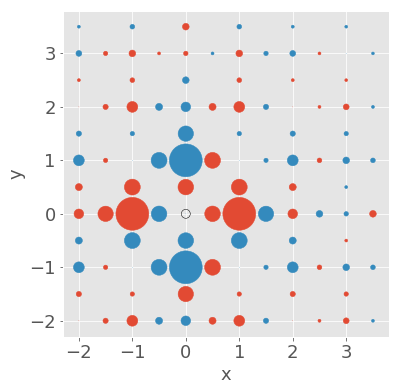

In [74]:
prop_cycle = rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colVec = b.nOrb*b.Nc*[colors[0]]
for ic in range(b.nOrb*b.Nc):
    if real(plotrspaceCu[ic,2])*10 < 0.0: colVec[ic] = colors[1]
fig, ax = mpl.subplots(figsize=(6,6))
ax.scatter(plotrspaceCu[:,0], plotrspaceCu[:,1], s=(abs(real(plotrspaceCu[:,2])))*4000, marker='o',c=colVec)
ax.scatter(0, 0, s=80, facecolors='none', edgecolors='k')
#ax.scatter(0, 0, 50, marker='o',c=colors[4])
#ax.scatter(plotrspace[:,0], plotrspace[:,1], s=-plotrspace[:,2]*5000, marker='o',c='b')
ax.set(aspect=1)
mpl.xlabel('x',size=18)
mpl.ylabel('y',size=18)
ax.set_xlim(min(plotrspaceCu[:,0])-0.3,max(plotrspaceCu[:,0]+0.3)); ax.set_ylim(min(plotrspaceCu[:,1])-0.3,max(plotrspaceCu[:,1]+0.3));
mpl.xticks(np.arange(min(plotrspaceCu[:,0]+0), max(plotrspaceCu[:,0]+0), 1),size=18)
mpl.yticks(np.arange(min(plotrspaceCu[:,1]+0), max(plotrspaceCu[:,1]+0), 1),size=18)
#mpl.show()
mpl.savefig('Curspace6by6b10n115.pdf')

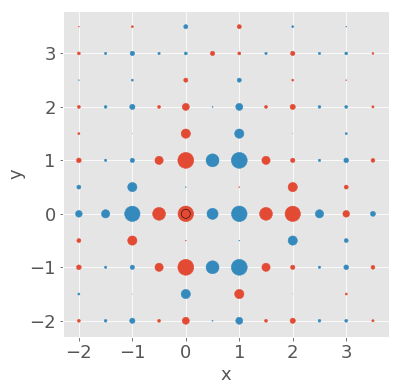

In [75]:
prop_cycle = rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colVec = b.nOrb*b.Nc*[colors[0]]
for ic in range(b.nOrb*b.Nc):
    if real(plotrspaceOx[ic,2])*10 < 0.0: colVec[ic] = colors[1]
fig, ax = mpl.subplots(figsize=(6,6))
ax.scatter(plotrspaceOx[:,0], plotrspaceOx[:,1], s=(abs(real(plotrspaceOx[:,2])))*4000, marker='o',c=colVec)
ax.scatter(0, 0, s=80, facecolors='none', edgecolors='k')
ax.set(aspect=1)
mpl.xlabel('x',size=18)
mpl.ylabel('y',size=18)
ax.set_xlim(min(plotrspaceOx[:,0])-0.3,max(plotrspaceOx[:,0]+0.3)); ax.set_ylim(min(plotrspaceOx[:,1])-0.3,max(plotrspaceOx[:,1]+0.3));
mpl.xticks(np.arange(min(plotrspaceOx[:,0]), max(plotrspaceOx[:,0]), 1),size=18)
mpl.yticks(np.arange(min(plotrspaceOx[:,1]), max(plotrspaceOx[:,1]), 1),size=18)
#mpl.show()
mpl.savefig('Oxrspace6by6b10n115.pdf')

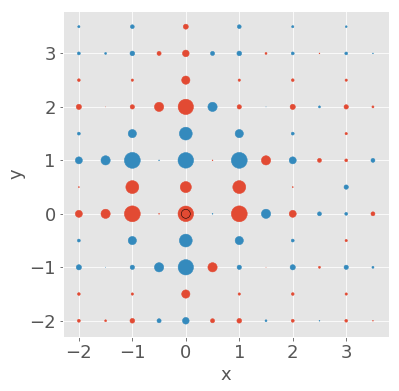

In [76]:
prop_cycle = rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colVec = b.nOrb*b.Nc*[colors[0]]
for ic in range(b.nOrb*b.Nc):
    if real(plotrspaceOy[ic,2])*10 < 0.0: colVec[ic] = colors[1]
fig, ax = mpl.subplots(figsize=(6,6))
ax.scatter(plotrspaceOy[:,0], plotrspaceOy[:,1], s=(abs(real(plotrspaceOy[:,2])))*4000, marker='o',c=colVec)
ax.scatter(0, 0, s=80, facecolors='none', edgecolors='k')
ax.set(aspect=1)
mpl.xlabel('x',size=18)
mpl.ylabel('y',size=18)
ax.set_xlim(min(plotrspaceOy[:,0])-0.3,max(plotrspaceOy[:,0]+0.3)); ax.set_ylim(min(plotrspaceOy[:,1])-0.3,max(plotrspaceOy[:,1]+0.3));
mpl.xticks(np.arange(min(plotrspaceOy[:,0]), max(plotrspaceOy[:,0]), 1),size=18)
mpl.yticks(np.arange(min(plotrspaceOy[:,1]), max(plotrspaceOy[:,1]), 1),size=18)
#mpl.show()
mpl.savefig('Oyrspace6by6b10n115.pdf')

In [15]:
import numpy as np
import math
from numpy import *
import matplotlib.pyplot as mpl
import h5py
import sys
import os
from matplotlib.pyplot import *
import matplotlib as mpll
import symmetrize_Nc4x4
Kvecs = b.Kvecs
Rvecs = Kvecs/Kvecs[1,1]
Nw = b.evecs.shape[0]
iw0=int(Nw/2)
plotrspace = zeros((b.nOrb*b.nOrb*b.Nc,3),dtype='double')

plotrspacedd = zeros((b.Nc,3),dtype='double')
plotrspacedL = zeros((b.Nc,3),dtype='double')
plotrspacedLbar = zeros((b.Nc,3),dtype='double')
plotrspaceLd = zeros((b.Nc,3),dtype='double')
plotrspaceLL = zeros((b.Nc,3),dtype='double')
plotrspaceLLbar = zeros((b.Nc,3),dtype='double')
plotrspaceLbard = zeros((b.Nc,3),dtype='double')
plotrspaceLbarL = zeros((b.Nc,3),dtype='double')
plotrspaceLbarLbar = zeros((b.Nc,3),dtype='double')
plotrspaceZRSZRS = zeros((b.Nc,3),dtype='double')

bandphase = zeros((b.nOrb,b.nOrb,2),dtype='double')
bandphase[0,1,0]=0
bandphase[1,0,0]=0
bandphase[0,2,0]=1/2
bandphase[0,2,1]=1/2
bandphase[2,0,0]=-1/2
bandphase[2,0,1]=-1/2
bandphase[1,2,0]=1/2
bandphase[1,2,1]=1/2
bandphase[2,1,0]=-1/2
bandphase[2,1,1]=-1/2
evecskspace = zeros((b.Nc,b.nOrb,b.nOrb),dtype='complex')
evecskspacetemp = zeros((b.Nc,b.nOrb,b.nOrb),dtype='complex')
evecsrspace = zeros((b.Nc,b.nOrb,b.nOrb),dtype='complex')
rightmatrix = zeros((b.Nc,b.nOrb,b.nOrb),dtype='complex')
leftmatrix = zeros((b.Nc,b.nOrb,b.nOrb),dtype='complex')
evecssymwithphase = zeros((b.Nc,b.nOrb,b.nOrb),dtype='complex')
evecssymLLbar = zeros((b.Nc,b.nOrb,b.nOrb),dtype='complex')


leftmatrix[:,0,0]=rightmatrix[:,0,0]=1.0


for k in range(b.Nc):
    gammak = sqrt(sin(Kvecs[k,0]/2)**2+sin(Kvecs[k,1]/2)**2)
    if (abs(gammak) < 0.0000000001):
        rightmatrix[k,1,1]= 1j/sqrt(2)
        rightmatrix[k,1,2]= -1j/sqrt(2)
        rightmatrix[k,2,1]= -1j/sqrt(2)
        rightmatrix[k,2,2]= -1j/sqrt(2)
        leftmatrix[k,1,1]= -1j/sqrt(2)
        leftmatrix[k,1,2]= 1j/sqrt(2)
        leftmatrix[k,2,1]= 1j/sqrt(2)
        leftmatrix[k,2,2]= 1j/sqrt(2)
    else:
        rightmatrix[k,1,1]= 1j * sin(Kvecs[k,0]/2)/gammak
        rightmatrix[k,1,2]= -1j * sin(Kvecs[k,1]/2)/gammak
        rightmatrix[k,2,1]= -1j * sin(Kvecs[k,1]/2)/gammak
        rightmatrix[k,2,2]= -1j * sin(Kvecs[k,0]/2)/gammak
        leftmatrix[k,1,1]= -1j * sin(Kvecs[k,0]/2)/gammak
        leftmatrix[k,1,2]= 1j * sin(Kvecs[k,1]/2)/gammak
        leftmatrix[k,2,1]= 1j * sin(Kvecs[k,1]/2)/gammak
        leftmatrix[k,2,2]= 1j * sin(Kvecs[k,0]/2)/gammak

    
#for k in range(b.Nc):
#    for b1 in range (b.nOrb):
#        for b2 in range (b.nOrb):
#            evecssymwithphase[k,b1,b2] = evecssym[iw0,k,b1,b2,0] * exp(-1.0 * 1j * (Kvecs[k,0] * bandphase[b1,b2,0] + Kvecs[k,1] * bandphase[b1,b2,1]))

evecskspacetemp = b.evecs[iw0,:,:,:,0]
for i in range (b.Nc):
    evecskspace[i,:,:] = evecskspacetemp[i,:,:]
    if (Kvecs[i,0]<-0.01):
        evecskspace[i,0,1] = -evecskspacetemp[i,0,1]
        evecskspace[i,1,0] = -evecskspacetemp[i,1,0]
    if (Kvecs[i,1]<-0.01):
        evecskspace[i,0,2] = -evecskspacetemp[i,0,2]
        evecskspace[i,2,0] = -evecskspacetemp[i,2,0]
    if ((Kvecs[i,0]<-0.01 and Kvecs[i,1]>0.01) or (Kvecs[i,1]<-0.01 and Kvecs[i,0]>0.01)):
        evecskspace[i,1,2] = -evecskspacetemp[i,1,2]
        evecskspace[i,2,1] = -evecskspacetemp[i,2,1]


for k in range(b.Nc):
    evecssymLLbar[k,:,:] = np.dot(np.dot(leftmatrix[k,:,:],evecskspace[k,:,:]),rightmatrix[k,:,:])
    
evecskspace = evecssymLLbar

for i in range (b.Nc):
    for b1 in range (b.nOrb):
        for b2 in range (b.nOrb):
            plotrspace[i*b.nOrb*b.nOrb+b1*b.nOrb+b2,0] = Rvecs[i,0] + bandphase[b1,b2,0]
            plotrspace[i*b.nOrb*b.nOrb+b1*b.nOrb+b2,1] = Rvecs[i,1] + bandphase[b1,b2,1]
            for k in range (b.Nc):
                #evecsrspace[i,b1,b2] += (1 / sqrt(b.Nc)) * evecskspace[k,b1,b2] * exp(-1.0 * 1j * (Kvecs[k,0] * Rvecs[i,0] + Kvecs[k,1] * Rvecs[i,1] + Kvecs[k,0] * bandphase[b1,b2,0] + Kvecs[k,1] * bandphase[b1,b2,1]))
                evecsrspace[i,b1,b2] += (1 / sqrt(b.Nc)) * evecskspace[k,b1,b2] * exp(-1.0 * 1j * (Kvecs[k,0] * Rvecs[i,0] + Kvecs[k,1] * Rvecs[i,1] + Kvecs[k,0] * bandphase[b1,b2,0] + Kvecs[k,1] * bandphase[b1,b2,1]))

for i in range (b.Nc):
    for b1 in range (b.nOrb):
        for b2 in range (b.nOrb):
            plotrspace[i*b.nOrb*b.nOrb+b1*b.nOrb+b2,2] = real(evecsrspace[i,b1,b2])

for i in range (b.Nc):
    for b2 in range (b.nOrb):
        plotrspacedd[i,0] = plotrspace[i*b.nOrb*b.nOrb+0*b.nOrb+0,0]
        plotrspacedd[i,1] = plotrspace[i*b.nOrb*b.nOrb+0*b.nOrb+0,1]
        plotrspacedd[i,2] = real(evecsrspace[i,0,0])
        plotrspacedL[i,0] = plotrspace[i*b.nOrb*b.nOrb+0*b.nOrb+1,0]
        plotrspacedL[i,1] = plotrspace[i*b.nOrb*b.nOrb+0*b.nOrb+1,1]
        plotrspacedL[i,2] = real(evecsrspace[i,0,1])
        plotrspacedLbar[i,0] = plotrspace[i*b.nOrb*b.nOrb+0*b.nOrb+2,0]
        plotrspacedLbar[i,1] = plotrspace[i*b.nOrb*b.nOrb+0*b.nOrb+2,1]
        plotrspacedLbar[i,2] = real(evecsrspace[i,0,2])
        plotrspaceLd[i,0] = plotrspace[i*b.nOrb*b.nOrb+1*b.nOrb+0,0]
        plotrspaceLd[i,1] = plotrspace[i*b.nOrb*b.nOrb+1*b.nOrb+0,1]
        plotrspaceLd[i,2] = real(evecsrspace[i,1,0])
        plotrspaceLbard[i,0] = plotrspace[i*b.nOrb*b.nOrb+2*b.nOrb+0,0]
        plotrspaceLbard[i,1] = plotrspace[i*b.nOrb*b.nOrb+2*b.nOrb+0,1]
        plotrspaceLbard[i,2] = real(evecsrspace[i,2,0])
        plotrspaceLL[i,0] = plotrspace[i*b.nOrb*b.nOrb+1*b.nOrb+1,0]
        plotrspaceLL[i,1] = plotrspace[i*b.nOrb*b.nOrb+1*b.nOrb+1,1]
        plotrspaceLL[i,2] = real(evecsrspace[i,1,1])
        plotrspaceLLbar[i,0] = plotrspace[i*b.nOrb*b.nOrb+1*b.nOrb+2,0]
        plotrspaceLLbar[i,1] = plotrspace[i*b.nOrb*b.nOrb+1*b.nOrb+2,1]
        plotrspaceLLbar[i,2] = real(evecsrspace[i,1,2])
        plotrspaceLbarL[i,0] = plotrspace[i*b.nOrb*b.nOrb+2*b.nOrb+1,0]
        plotrspaceLbarL[i,1] = plotrspace[i*b.nOrb*b.nOrb+2*b.nOrb+1,1]
        plotrspaceLbarL[i,2] = real(evecsrspace[i,2,1])
        plotrspaceLbarLbar[i,0] = plotrspace[i*b.nOrb*b.nOrb+2*b.nOrb+2,0]
        plotrspaceLbarLbar[i,1] = plotrspace[i*b.nOrb*b.nOrb+2*b.nOrb+2,1]
        plotrspaceLbarLbar[i,2] = real(evecsrspace[i,2,2])
        plotrspaceZRSZRS[i,0] = plotrspace[i*b.nOrb*b.nOrb+0*b.nOrb+0,0]
        plotrspaceZRSZRS[i,1] = plotrspace[i*b.nOrb*b.nOrb+0*b.nOrb+0,1]
        plotrspaceZRSZRS[i,2] = real(evecsrspace[i,0,0]+evecsrspace[i,0,1]+evecsrspace[i,1,0]+evecsrspace[i,1,1])/2
        
for i in range (b.Nc):
    for b2 in range (b.nOrb):
        if (plotrspaceLbard[i,0]<-2):
            plotrspaceLbard[i,0] += 6
        if (plotrspaceLbard[i,1]<-2):
            plotrspaceLbard[i,1] += 6
        if (plotrspaceLbarL[i,0]<-2):
            plotrspaceLbarL[i,0] += 6
        if (plotrspaceLbarL[i,1]<-2):
            plotrspaceLbarL[i,1] += 6
        
        
        
#b2 = 0
#for i in range (b.Nc):
#    plotrspaceOx[i*b.nOrb+b2,2] = 0
#    plotrspaceOy[i*b.nOrb+b2,2] = 0


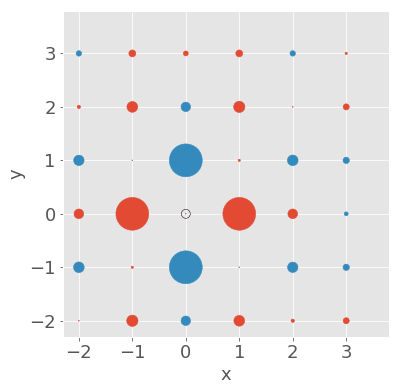

In [10]:
prop_cycle = rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colVec = b.Nc*[colors[0]]
for ic in range(b.Nc):
    if real(plotrspacedd[ic,2])*10 < 0.0: colVec[ic] = colors[1]
fig, ax = mpl.subplots(figsize=(6,6))
ax.scatter(plotrspacedd[:,0], plotrspacedd[:,1], s=(abs(real(plotrspacedd[:,2])))*4000, marker='o',c=colVec)
ax.scatter(0, 0, s=80, facecolors='none', edgecolors='k')
#ax.scatter(0, 0, 50, marker='o',c=colors[4])
#ax.scatter(plotrspace[:,0], plotrspace[:,1], s=-plotrspace[:,2]*5000, marker='o',c='b')
ax.set(aspect=1)
mpl.xlabel('x',size=18)
mpl.ylabel('y',size=18)
ax.set_xlim(min(plotrspaceCu[:,0])-0.3,max(plotrspaceCu[:,0]+0.3)); ax.set_ylim(min(plotrspaceCu[:,1])-0.3,max(plotrspaceCu[:,1]+0.3));
mpl.xticks(np.arange(min(plotrspaceCu[:,0]+0), max(plotrspaceCu[:,0]+0), 1),size=18)
mpl.yticks(np.arange(min(plotrspaceCu[:,1]+0), max(plotrspaceCu[:,1]+0), 1),size=18)
#mpl.show()
mpl.savefig('Curspace6by6b10n115dd.pdf')

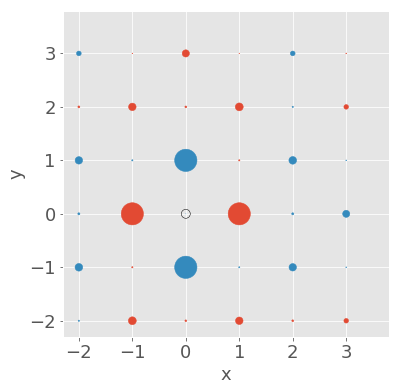

In [11]:
prop_cycle = rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colVec = b.Nc*[colors[0]]
for ic in range(b.Nc):
    if real(plotrspacedL[ic,2])*10 < 0.0: colVec[ic] = colors[1]
fig, ax = mpl.subplots(figsize=(6,6))
ax.scatter(plotrspacedL[:,0], plotrspacedL[:,1], s=(abs(real(plotrspacedL[:,2])))*4000, marker='o',c=colVec)
ax.scatter(0, 0, s=80, facecolors='none', edgecolors='k')
#ax.scatter(0, 0, 50, marker='o',c=colors[4])
#ax.scatter(plotrspace[:,0], plotrspace[:,1], s=-plotrspace[:,2]*5000, marker='o',c='b')
ax.set(aspect=1)
mpl.xlabel('x',size=18)
mpl.ylabel('y',size=18)
ax.set_xlim(min(plotrspaceCu[:,0])-0.3,max(plotrspaceCu[:,0]+0.3)); ax.set_ylim(min(plotrspaceCu[:,1])-0.3,max(plotrspaceCu[:,1]+0.3));
mpl.xticks(np.arange(min(plotrspaceCu[:,0]+0), max(plotrspaceCu[:,0]+0), 1),size=18)
mpl.yticks(np.arange(min(plotrspaceCu[:,1]+0), max(plotrspaceCu[:,1]+0), 1),size=18)
#mpl.show()
mpl.savefig('Curspace6by6b10n115dl.pdf')

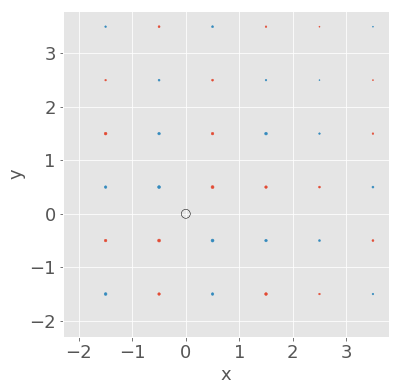

In [12]:
prop_cycle = rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colVec = b.Nc*[colors[0]]
for ic in range(b.Nc):
    if real(plotrspacedLbar[ic,2])*10 < 0.0: colVec[ic] = colors[1]
fig, ax = mpl.subplots(figsize=(6,6))
ax.scatter(plotrspacedLbar[:,0], plotrspacedLbar[:,1], s=(abs(real(plotrspacedLbar[:,2])))*4000, marker='o',c=colVec)
ax.scatter(0, 0, s=80, facecolors='none', edgecolors='k')
#ax.scatter(0, 0, 50, marker='o',c=colors[4])
#ax.scatter(plotrspace[:,0], plotrspace[:,1], s=-plotrspace[:,2]*5000, marker='o',c='b')
ax.set(aspect=1)
mpl.xlabel('x',size=18)
mpl.ylabel('y',size=18)
ax.set_xlim(min(plotrspaceCu[:,0])-0.3,max(plotrspaceCu[:,0]+0.3)); ax.set_ylim(min(plotrspaceCu[:,1])-0.3,max(plotrspaceCu[:,1]+0.3));
mpl.xticks(np.arange(min(plotrspaceCu[:,0]+0), max(plotrspaceCu[:,0]+0), 1),size=18)
mpl.yticks(np.arange(min(plotrspaceCu[:,1]+0), max(plotrspaceCu[:,1]+0), 1),size=18)
#mpl.show()
mpl.savefig('Curspace6by6b10n115dlbar.pdf')

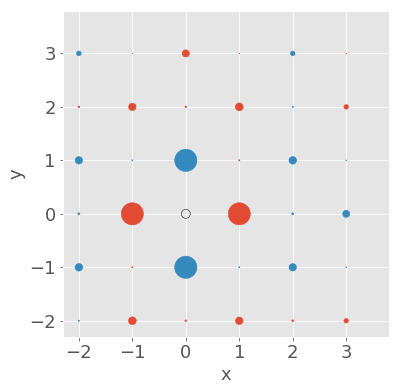

In [13]:
prop_cycle = rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colVec = b.Nc*[colors[0]]
for ic in range(b.Nc):
    if real(plotrspaceLd[ic,2])*10 < 0.0: colVec[ic] = colors[1]
fig, ax = mpl.subplots(figsize=(6,6))
ax.scatter(plotrspaceLd[:,0], plotrspaceLd[:,1], s=(abs(real(plotrspaceLd[:,2])))*4000, marker='o',c=colVec)
ax.scatter(0, 0, s=80, facecolors='none', edgecolors='k')
#ax.scatter(0, 0, 50, marker='o',c=colors[4])
#ax.scatter(plotrspace[:,0], plotrspace[:,1], s=-plotrspace[:,2]*5000, marker='o',c='b')
ax.set(aspect=1)
mpl.xlabel('x',size=18)
mpl.ylabel('y',size=18)
ax.set_xlim(min(plotrspaceCu[:,0])-0.3,max(plotrspaceCu[:,0]+0.3)); ax.set_ylim(min(plotrspaceCu[:,1])-0.3,max(plotrspaceCu[:,1]+0.3));
mpl.xticks(np.arange(min(plotrspaceCu[:,0]+0), max(plotrspaceCu[:,0]+0), 1),size=18)
mpl.yticks(np.arange(min(plotrspaceCu[:,1]+0), max(plotrspaceCu[:,1]+0), 1),size=18)
#mpl.show()
mpl.savefig('Curspace6by6b10n115ld.pdf')

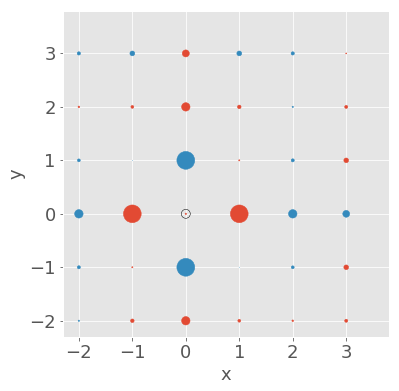

In [14]:
prop_cycle = rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colVec = b.Nc*[colors[0]]
for ic in range(b.Nc):
    if real(plotrspaceLL[ic,2])*10 < 0.0: colVec[ic] = colors[1]
fig, ax = mpl.subplots(figsize=(6,6))
ax.scatter(plotrspaceLL[:,0], plotrspaceLL[:,1], s=(abs(real(plotrspaceLL[:,2])))*4000, marker='o',c=colVec)
ax.scatter(0, 0, s=80, facecolors='none', edgecolors='k')
#ax.scatter(0, 0, 50, marker='o',c=colors[4])
#ax.scatter(plotrspace[:,0], plotrspace[:,1], s=-plotrspace[:,2]*5000, marker='o',c='b')
ax.set(aspect=1)
mpl.xlabel('x',size=18)
mpl.ylabel('y',size=18)
ax.set_xlim(min(plotrspaceCu[:,0])-0.3,max(plotrspaceCu[:,0]+0.3)); ax.set_ylim(min(plotrspaceCu[:,1])-0.3,max(plotrspaceCu[:,1]+0.3));
mpl.xticks(np.arange(min(plotrspaceCu[:,0]+0), max(plotrspaceCu[:,0]+0), 1),size=18)
mpl.yticks(np.arange(min(plotrspaceCu[:,1]+0), max(plotrspaceCu[:,1]+0), 1),size=18)
#mpl.show()
mpl.savefig('Curspace6by6b10n115ll.pdf')

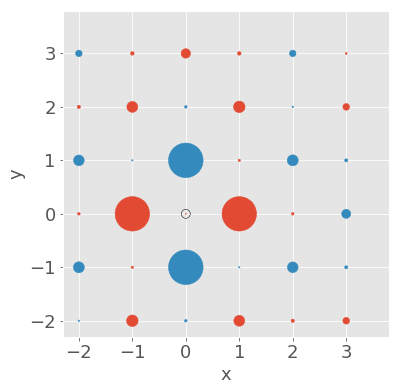

In [16]:
prop_cycle = rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colVec = b.Nc*[colors[0]]
for ic in range(b.Nc):
    if real(plotrspaceZRSZRS[ic,2])*10 < 0.0: colVec[ic] = colors[1]
fig, ax = mpl.subplots(figsize=(6,6))
ax.scatter(plotrspaceZRSZRS[:,0], plotrspaceZRSZRS[:,1], s=(abs(real(plotrspaceZRSZRS[:,2])))*4000, marker='o',c=colVec)
ax.scatter(0, 0, s=80, facecolors='none', edgecolors='k')
#ax.scatter(0, 0, 50, marker='o',c=colors[4])
#ax.scatter(plotrspace[:,0], plotrspace[:,1], s=-plotrspace[:,2]*5000, marker='o',c='b')
ax.set(aspect=1)
mpl.xlabel('x',size=18)
mpl.ylabel('y',size=18)
ax.set_xlim(min(plotrspaceCu[:,0])-0.3,max(plotrspaceCu[:,0]+0.3)); ax.set_ylim(min(plotrspaceCu[:,1])-0.3,max(plotrspaceCu[:,1]+0.3));
mpl.xticks(np.arange(min(plotrspaceCu[:,0]+0), max(plotrspaceCu[:,0]+0), 1),size=18)
mpl.yticks(np.arange(min(plotrspaceCu[:,1]+0), max(plotrspaceCu[:,1]+0), 1),size=18)
#mpl.show()
mpl.savefig('Curspace6by6b10n115ZRSZRS.pdf')

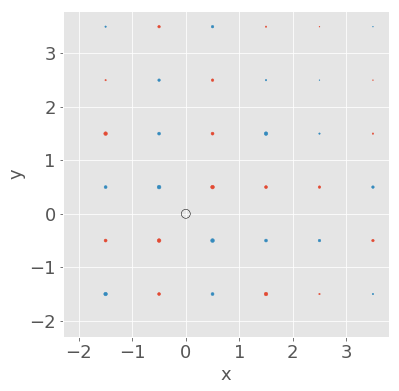

In [88]:
prop_cycle = rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colVec = b.Nc*[colors[0]]
for ic in range(b.Nc):
    if real(plotrspaceLbarL[ic,2])*10 < 0.0: colVec[ic] = colors[1]
fig, ax = mpl.subplots(figsize=(6,6))
ax.scatter(plotrspaceLbarL[:,0], plotrspaceLbarL[:,1], s=(abs(real(plotrspaceLbarL[:,2])))*4000, marker='o',c=colVec)
ax.scatter(0, 0, s=80, facecolors='none', edgecolors='k')
#ax.scatter(0, 0, 50, marker='o',c=colors[4])
#ax.scatter(plotrspace[:,0], plotrspace[:,1], s=-plotrspace[:,2]*5000, marker='o',c='b')
ax.set(aspect=1)
mpl.xlabel('x',size=18)
mpl.ylabel('y',size=18)
ax.set_xlim(min(plotrspaceCu[:,0])-0.3,max(plotrspaceCu[:,0]+0.3)); ax.set_ylim(min(plotrspaceCu[:,1])-0.3,max(plotrspaceCu[:,1]+0.3));
mpl.xticks(np.arange(min(plotrspaceCu[:,0]+0), max(plotrspaceCu[:,0]+0), 1),size=18)
mpl.yticks(np.arange(min(plotrspaceCu[:,1]+0), max(plotrspaceCu[:,1]+0), 1),size=18)
#mpl.show()
mpl.savefig('Curspace6by6b10n115lbarl.pdf')

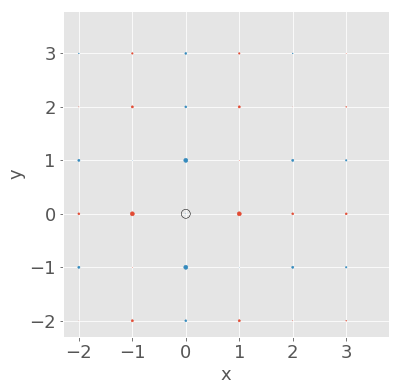

In [89]:
prop_cycle = rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colVec = b.Nc*[colors[0]]
for ic in range(b.Nc):
    if real(plotrspaceLbarLbar[ic,2])*10 < 0.0: colVec[ic] = colors[1]
fig, ax = mpl.subplots(figsize=(6,6))
ax.scatter(plotrspaceLbarLbar[:,0], plotrspaceLbarLbar[:,1], s=(abs(real(plotrspaceLbarLbar[:,2])))*4000, marker='o',c=colVec)
ax.scatter(0, 0, s=80, facecolors='none', edgecolors='k')
#ax.scatter(0, 0, 50, marker='o',c=colors[4])
#ax.scatter(plotrspace[:,0], plotrspace[:,1], s=-plotrspace[:,2]*5000, marker='o',c='b')
ax.set(aspect=1)
mpl.xlabel('x',size=18)
mpl.ylabel('y',size=18)
ax.set_xlim(min(plotrspaceCu[:,0])-0.3,max(plotrspaceCu[:,0]+0.3)); ax.set_ylim(min(plotrspaceCu[:,1])-0.3,max(plotrspaceCu[:,1]+0.3));
mpl.xticks(np.arange(min(plotrspaceCu[:,0]+0), max(plotrspaceCu[:,0]+0), 1),size=18)
mpl.yticks(np.arange(min(plotrspaceCu[:,1]+0), max(plotrspaceCu[:,1]+0), 1),size=18)
#mpl.show()
mpl.savefig('Curspace6by6b10n115lbarlbar.pdf')

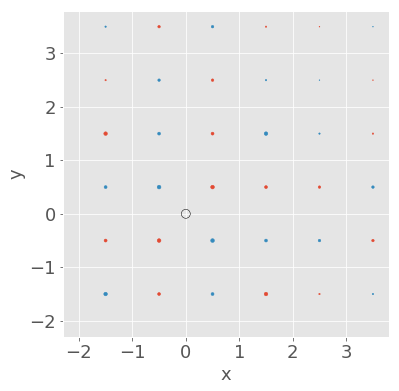

In [90]:
prop_cycle = rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colVec = b.Nc*[colors[0]]
for ic in range(b.Nc):
    if real(plotrspaceLLbar[ic,2])*10 < 0.0: colVec[ic] = colors[1]
fig, ax = mpl.subplots(figsize=(6,6))
ax.scatter(plotrspaceLLbar[:,0], plotrspaceLLbar[:,1], s=(abs(real(plotrspaceLLbar[:,2])))*4000, marker='o',c=colVec)
ax.scatter(0, 0, s=80, facecolors='none', edgecolors='k')
#ax.scatter(0, 0, 50, marker='o',c=colors[4])
#ax.scatter(plotrspace[:,0], plotrspace[:,1], s=-plotrspace[:,2]*5000, marker='o',c='b')
ax.set(aspect=1)
mpl.xlabel('x',size=18)
mpl.ylabel('y',size=18)
ax.set_xlim(min(plotrspaceCu[:,0])-0.3,max(plotrspaceCu[:,0]+0.3)); ax.set_ylim(min(plotrspaceCu[:,1])-0.3,max(plotrspaceCu[:,1]+0.3));
mpl.xticks(np.arange(min(plotrspaceCu[:,0]+0), max(plotrspaceCu[:,0]+0), 1),size=18)
mpl.yticks(np.arange(min(plotrspaceCu[:,1]+0), max(plotrspaceCu[:,1]+0), 1),size=18)
#mpl.show()
mpl.savefig('Curspace6by6b10n115llbar.pdf')

In [91]:
import numpy as np
import math
from numpy import *
import matplotlib.pyplot as mpl
import h5py
import sys
import os
from matplotlib.pyplot import *
import matplotlib as mpll


        
Kvecs = b.Kvecs
Rvecs = Kvecs/Kvecs[1,1]
Nw = b.evecs.shape[0]
iw0=int(Nw/2)

print()
print("symmetrized results:")

evecsrenorm=zeros((b.Nc,b.nOrb,b.nOrb),dtype='double')
evecsrenorm=evecsrspace[:,:,:].real/linalg.norm(evecsrspace[:,:,:].real)
weighteach=zeros((3,3),dtype='double')
for i in range (3):
    for j in range (3):
        weighteach[i,j] = linalg.norm(evecsrenorm[:,i,j])*linalg.norm(evecsrenorm[:,i,j])
print("weightmartix = ",weighteach)
print("weight of d-d = ",weighteach[0,0])
print("weight of d-p = ",weighteach[0,1]+weighteach[1,0]+weighteach[0,2]+weighteach[2,0])
print("weight of p-p = ",weighteach[1,1]+weighteach[2,2]+weighteach[1,2]+weighteach[2,1])
print("Total weight = ",sum(weighteach))

AmpNNdd=0-evecsrenorm[1,0,0]-evecsrenorm[5,0,0]+evecsrenorm[6,0,0]+evecsrenorm[30,0,0]
WeightNNdd=(evecsrenorm[1,0,0]**2+evecsrenorm[5,0,0]**2+evecsrenorm[6,0,0]**2+evecsrenorm[30,0,0]**2)
print("AmpNNdd=",AmpNNdd,"WeightNNdd=",WeightNNdd)

AmpNNdL=0-evecsrenorm[1,0,1]-evecsrenorm[5,0,1]+evecsrenorm[6,0,1]+evecsrenorm[30,0,1]
WeightNNdL=(evecsrenorm[1,0,1]**2+evecsrenorm[5,0,1]**2+evecsrenorm[6,0,1]**2+evecsrenorm[30,0,1]**2)
print("AmpNNdL=",AmpNNdL,"WeightNNdL=",WeightNNdL)

AmpNNLd=0-evecsrenorm[1,1,0]-evecsrenorm[5,1,0]+evecsrenorm[6,1,0]+evecsrenorm[30,1,0]
WeightNNLd=(evecsrenorm[1,1,0]**2+evecsrenorm[5,1,0]**2+evecsrenorm[6,1,0]**2+evecsrenorm[30,1,0]**2)
print("AmpNNLd=",AmpNNLd,"WeightNNLd=",WeightNNLd)

AmpNNLL=0-evecsrenorm[1,1,1]-evecsrenorm[5,1,1]+evecsrenorm[6,1,1]+evecsrenorm[30,1,1]
WeightNNLL=(evecsrenorm[1,1,1]**2+evecsrenorm[5,1,1]**2+evecsrenorm[6,1,1]**2+evecsrenorm[30,1,1]**2)
print("AmpNNLL=",AmpNNLL,"WeightNNLL=",WeightNNLL)

AmpNNLbarLbar=0-evecsrenorm[1,2,2]-evecsrenorm[5,2,2]+evecsrenorm[6,2,2]+evecsrenorm[30,2,2]
WeightNNLbarLbar=(evecsrenorm[1,2,2]**2+evecsrenorm[5,2,2]**2+evecsrenorm[6,2,2]**2+evecsrenorm[30,2,2]**2)
print("AmpNNLbarLbar=",AmpNNLbarLbar,"WeightNNLbarLbar=",WeightNNLbarLbar)

WeightNNdLbar=(evecsrenorm[0,0,2]**2+evecsrenorm[5,0,2]**2+evecsrenorm[30,0,2]**2+evecsrenorm[35,0,2]**2)
print("WeightNNdLbar=",WeightNNdLbar)

WeightNNLbard=(evecsrenorm[0,2,0]**2+evecsrenorm[1,2,0]**2+evecsrenorm[6,2,0]**2+evecsrenorm[7,2,0]**2)
print("WeightNNLbard=",WeightNNLbard)

WeightNNLbarL=(evecsrenorm[0,2,1]**2+evecsrenorm[1,2,1]**2+evecsrenorm[6,2,1]**2+evecsrenorm[7,2,1]**2)
print("WeightNNLbarL=",WeightNNLbarL)

WeightNNLLbar=(evecsrenorm[0,1,2]**2+evecsrenorm[5,1,2]**2+evecsrenorm[30,1,2]**2+evecsrenorm[35,1,2]**2)
print("WeightNNLLbar=",WeightNNLLbar)

print("WeightNNdd=",WeightNNdd)
print("WeightNNdL+WeightNNLd=",WeightNNdL+WeightNNLd)
print("WeightNNLL=",WeightNNLL)
print("All Lbar related=",WeightNNdLbar+WeightNNLbard+WeightNNLLbar+WeightNNLbarL+WeightNNLbarLbar)
print("Total NN weight=",WeightNNdd+WeightNNdL+WeightNNLd+WeightNNLL+WeightNNdLbar+WeightNNLbard+WeightNNLLbar+WeightNNLbarL+WeightNNLbarLbar)


symmetrized results:
weightmartix =  [[6.61943196e-01 1.38985515e-01 1.51003628e-04]
 [1.38985515e-01 5.89235777e-02 3.35746343e-04]
 [1.51003628e-04 3.35746343e-04 1.88696538e-04]]
weight of d-d =  0.6619431956041935
weight of d-p =  0.278273037473545
weight of p-p =  0.0597837669222619
Total weight =  1.0000000000000004
AmpNNdd= 1.6001487611762095 WeightNNdd= 0.6401266024542771
AmpNNdL= 0.7328517415362936 WeightNNdL= 0.13427066180822428
AmpNNLd= 0.7328517415362914 WeightNNLd= 0.13427066180822347
AmpNNLL= 0.4691547866635164 WeightNNLL= 0.055028683378892156
AmpNNLbarLbar= 0.02448006434705545 WeightNNLbarLbar= 0.00014981863179978398
WeightNNdLbar= 4.333137042276581e-05
WeightNNLbard= 4.333137042276697e-05
WeightNNLbarL= 0.00010624076683729768
WeightNNLLbar= 0.00010624076683728696
WeightNNdd= 0.6401266024542771
WeightNNdL+WeightNNLd= 0.2685413236164478
WeightNNLL= 0.055028683378892156
All Lbar related= 0.0004489629063199014
Total NN weight= 0.9641455723559369


In [56]:
for iw in range(256):
    for ik in range(36):
        if (abs(b.sigma[iw,ik,1,2])>0.000001):
            print("ik=",ik,abs(b.sigma[iw,ik,1,2]))

In [191]:
plotrspacedLbar[:,0],plotrspacedLbar[:,1]

(array([ 0. ,  0. ,  0.5,  0. ,  0. ,  0.5,  0. ,  0. ,  0.5,  0. ,  0. ,
         0.5,  0. ,  0. ,  0.5,  0. ,  0. ,  0.5,  1. ,  1. ,  1.5,  1. ,
         1. ,  1.5,  1. ,  1. ,  1.5,  1. ,  1. ,  1.5,  1. ,  1. ,  1.5,
         1. ,  1. ,  1.5,  2. ,  2. ,  2.5,  2. ,  2. ,  2.5,  2. ,  2. ,
         2.5,  2. ,  2. ,  2.5,  2. ,  2. ,  2.5,  2. ,  2. ,  2.5,  3. ,
         3. ,  3.5,  3. ,  3. ,  3.5,  3. ,  3. ,  3.5,  3. ,  3. ,  3.5,
         3. ,  3. ,  3.5,  3. ,  3. ,  3.5, -2. , -2. , -1.5, -2. , -2. ,
        -1.5, -2. , -2. , -1.5, -2. , -2. , -1.5, -2. , -2. , -1.5, -2. ,
        -2. , -1.5, -1. , -1. , -0.5, -1. , -1. , -0.5, -1. , -1. , -0.5,
        -1. , -1. , -0.5, -1. , -1. , -0.5, -1. , -1. , -0.5]),
 array([-0.5, -0.5,  0. ,  0.5,  0.5,  1. ,  1.5,  1.5,  2. ,  2.5,  2.5,
         3. , -2.5, -2.5, -2. , -1.5, -1.5, -1. , -0.5, -0.5,  0. ,  0.5,
         0.5,  1. ,  1.5,  1.5,  2. ,  2.5,  2.5,  3. , -2.5, -2.5, -2. ,
        -1.5, -1.5, -1. , -0.5, -0.5,  0. ,  0.5